In [72]:
# CS 181, Spring 2020
# Homework 4

import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial import distance
from seaborn import heatmap
from random import randint

# This line loads the images for you. Don't change it! 
large_dataset = np.load("data/large_dataset.npy")
small_dataset = np.load("data/small_dataset.npy")
small_labels = np.load("data/small_dataset_labels.npy").astype(int)

In [73]:
# You are welcome to change anything below this line. This is just an example of how your code may look.
# Keep in mind you may add more public methods for things like the visualization.
# Also, you must cluster all of the images in the provided dataset, so your code should be fast enough to do that.

class KMeans(object):
    # K is the K in KMeans
    def __init__(self, K):
        self.K = K

    def closest_centroid(self, point):
        return np.argmin([distance.euclidean(point, centroid) for centroid in self.centroids])
    
    def centroid_changing(self):
        for i,centroid in enumerate(self.centroids):
            if any(centroid!=self.previous_centroids[i]):
                return True
        return False
    
    def RSS(self):
        return np.sum([np.sum([np.square(datum-self.centroids[i]) for datum in cluster]) 
                for i,cluster in enumerate(self.clusters)])            
        
    # X is a (N x 28 x 28) array where 28x28 is the dimensions of each of the N images.
    def fit(self, X):
        self.X= X
#         randomly initialize K centroids -> k centroid
        self.centroids=[self.X[randint(0,len(self.X))] for i in range(self.K)]

        iteration=0
        RSSs=[]
#         loop: (till all the centroids are stable)
        while iteration==0 or self.centroid_changing():
            self.clusters=[[] for i in range(self.K)]
    #         assign all the data point (datatum) to its closest cluster (euclidian dist) -> k clusters 
            for datum in self.X:
                self.clusters[self.closest_centroid(datum)].append(datum)

#              recalculate the centroid based on the average values of the datums assigned to each cluster
            self.previous_centroids=self.centroids
            self.centroids= [np.mean(cluster,axis=0) for cluster in self.clusters]
            iteration+=1
            print(iteration,end='')
            RSSs.append(self.RSS())
#         plt.figure()
#         plt.plot(range(len(RSSs)),RSSs)
#         plt.title('K = 10', fontsize=12)
#         plt.xlabel('number of iteration', fontsize=12)
#         plt.ylabel('residual sum squares', fontsize=12)
#         plt.show()
        return self.RSS() 
    
    # This should return the arrays for K images. Each image should represent the mean of each of the fitted clusters.
    def get_mean_images(self):
        pass

K = 10
KMeansClassifier = KMeans(K=10)
KMeansClassifier.fit(large_dataset)

class HAC(object):
    def __init__(self, linkage):
        self.linkage = linkage
        

1234567891011

KeyboardInterrupt: 

In [74]:
# kmeans_models=[]
k5_model = KMeans(5)
k10_model = KMeans(10)
k20_model = KMeans(20)

In [35]:
# model_rssRun=[[model.fit(large_dataset) for i in range(5)] for model in kmeans_models]
k5_rssRun = [k5_model.fit(large_dataset) for i in range(5)]

1234567891011121314151617181920212223242512345678910111213141516171819202122232425262728123456789101112131415161718192012345678910111213141516171819202122232425262712345678910111213141516171819202122

In [75]:
k10_rssRun = [k10_model.fit(large_dataset) for i in range(5)]

123456789101112131415161718192021222324252627282930313233343512345678910111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686912345678910111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455123456789101112131415161718192021222324252627282930313233343536373839404112345678910111213141516171819202122232425262728

In [46]:
k20_rssRun = [k20_model.fit(large_dataset) for i in range(5)]

123456789101112131415161718192021222324252627282930313233343536373839404142434445123456789101112131415161718192021222324252627282930313233123456789101112131415161718192021222324252627282930313233341234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950511234567891011121314151617181920212223

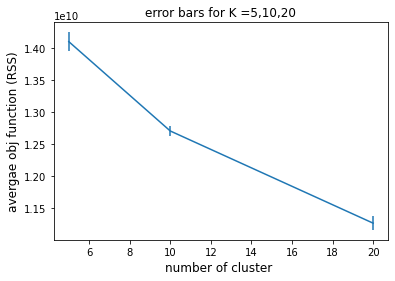

In [61]:
plt.errorbar([5,10,20], [np.mean(k5_rssRun),np.mean(k10_rssRun),np.mean(k20_rssRun)],
             yerr=[np.std(k5_rssRun)*2,np.std(k10_rssRun)*2,np.std(k20_rssRun)*2])
plt.title('error bars for K =5,10,20', fontsize=12)
plt.xlabel('number of cluster ', fontsize=12)
plt.ylabel('avergae obj function (RSS)', fontsize=12)
plt.show()

1234567891011121314151617181920212223242526272829303132333412345678910111213141516171819202122231234567891011121314151617181920212223242526272829303132333435363738394041424344454612345678910111213141516171819202122232425262728293031323334353637383940414212345678910111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455

c:\users\sul\anaconda3\envs\cmld_env\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


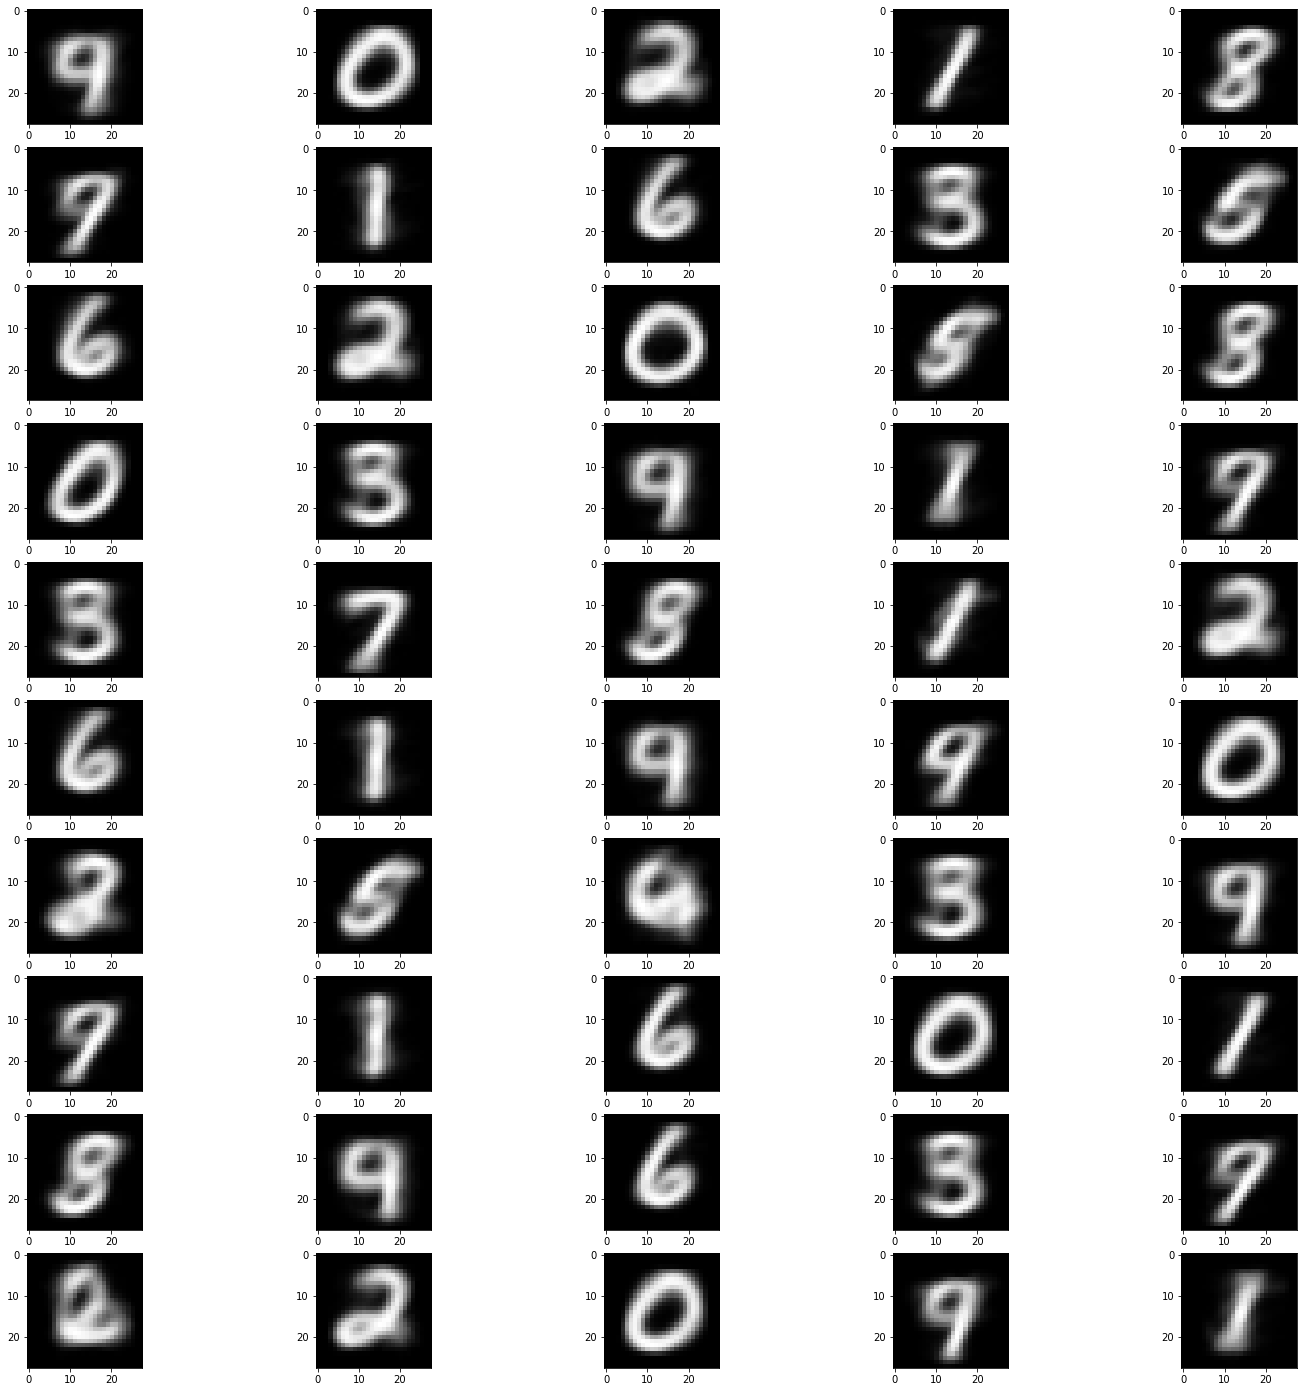

In [58]:
# This is how to plot an image. We ask that any images in your writeup be grayscale images, just as in this example.
fig = plt.figure(figsize=(25,25))
idx=1
for row in range(5):
    KMeansClassifier.fit(large_dataset)
    for column,centroid in enumerate(KMeansClassifier.centroids):
        ax = fig.add_subplot(10, 5, idx)
        idx+=1
        ax.imshow(centroid.reshape(28,28), cmap='Greys_r')
fig.show()
fig.savefig('test.png')

In [65]:
standardized_data=np.empty((large_dataset.shape[0],large_dataset.shape[1]))

for pixel in range(large_dataset.shape[1]):
    mean=np.mean(large_dataset[:,pixel])
    print(mean)
    std=np.std(large_dataset[:,pixel])
    for i,pic in enumerate(large_dataset):
        if std!=0:
            standardized_data[i,pixel]=(pic[pixel]-mean)/std
        else: 
            standardized_data[i,pixel]=(pic[pixel]-mean)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0204
0.0694
0.0942
0.0738
0.117
0.0908
0.1248
0.1074
0.1964
0.2442
0.1308
0.0826
0.0624
0.0916
0.0546
0.0284
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0116
0.0034
0.0102
0.0408
0.1884
0.3512
0.6324
0.7404
1.1422
1.7118
2.649
3.4238
4.682
4.6446
3.7628
2.5666
1.28
0.5788
0.169
0.0508
0.0222
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0012
0.0552
0.2358
0.4086
0.9224
1.6628
2.9592
4.4778
6.407
8.8488
11.4484
14.0784
15.2168
14.1324
10.7876
7.3668
3.891
1.85
0.83
0.276
0.1026
0.0
0.0
0.0
0.0
0.0
0.0
0.012
0.0966
0.4386
0.8502
1.8386
3.892
6.9574
11.6948
17.8988
25.4344
34.3304
42.435
47.4752
48.2112
44.1846
35.7414
26.2682
16.5954
8.982
4.9862
2.3282
0.8752
0.0726
0.0
0.0
0.0
0.0
0.0152
0.1166
0.4604
1.5806
3.3242
6.3574
11.0474
18.423
29.0652
42.3678
55.9304
71.913
85.3224
92.5816
92.8506
85.4202
72.4282
55.277
37.5428
22.835
13.0972
7.574
3.4464
0.8136
0.1382
0.003

1234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950511234567891011121314151617181920212223242526272812345678910111213141516171819202122232425262728293031323334353637383940414243444546471234567891011121314151617181920212223242526272829303132333435363738391234567891011121314151617181920212223242526272829303132333435

c:\users\sul\anaconda3\envs\cmld_env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


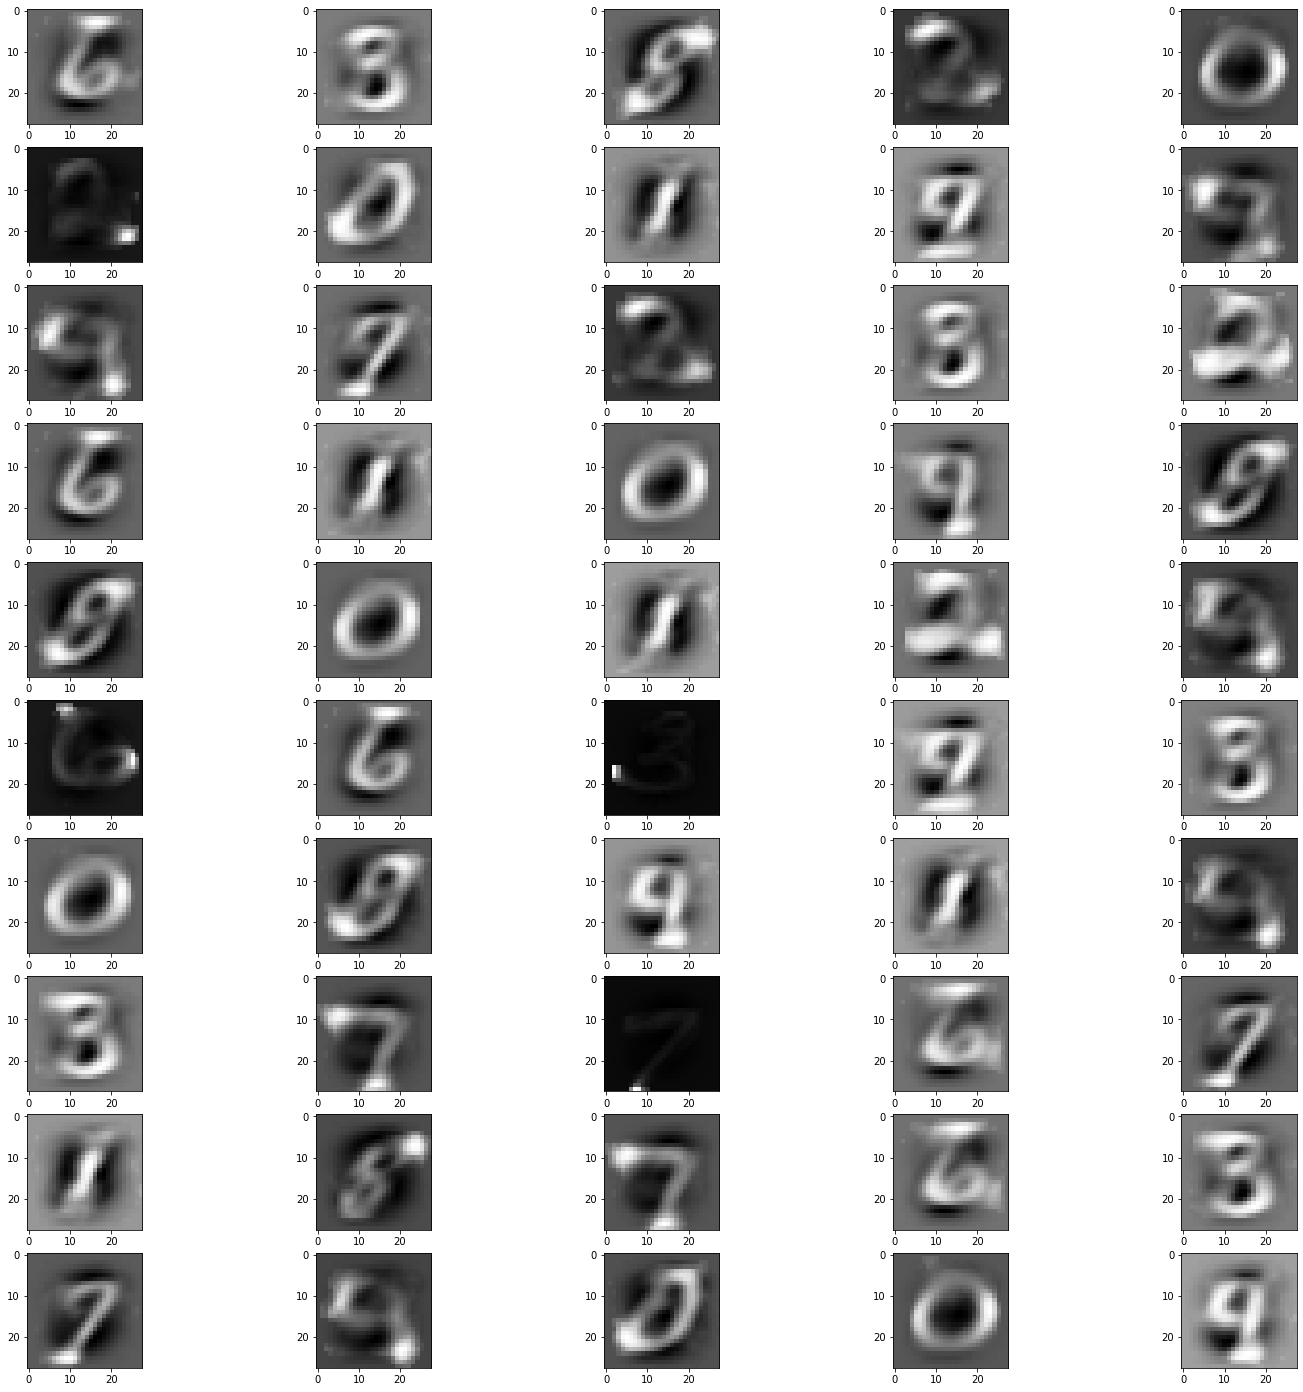

In [71]:
fig = plt.figure(figsize=(25,25))
KMeansClassifier = KMeans(10)
idx=1
for row in range(5):
    KMeansClassifier.fit(large_dataset_standardized)
    for column,centroid in enumerate(KMeansClassifier.centroids):
        ax = fig.add_subplot(10, 5, idx)
        idx+=1
        ax.imshow(centroid.reshape(28,28), cmap='Greys_r')
fig.show()
fig.savefig('StandardizedData.png')

12345678910111213141516

c:\users\sul\anaconda3\envs\cmld_env\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


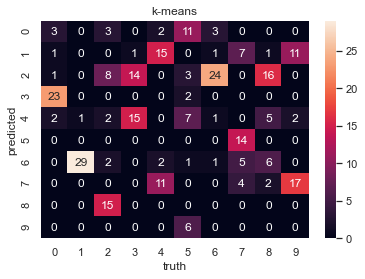

In [85]:
import seaborn as sns; sns.set()
kmean_model=KMeans(10)
kmean_model.fit(small_dataset)
labels = np.load("data/small_dataset_labels.npy")
fig = plt.figure()
plt.title('k-means', fontsize=12)

cluster_lable=np.zeros((10,10))
for i,datum in enumerate(small_dataset):
    for j,cluster in enumerate(kmean_model.clusters):
        if any([all(datum==datapoint) for datapoint in cluster]):
            cluster_lable[j,int(labels[i])]+=1
ax = sns.heatmap(cluster_lable,annot=True)
plt.xlabel('truth', fontsize=12)
plt.ylabel('predicted', fontsize=12)
fig.savefig('kmean_Heatmap.png')     
fig.show()